## Chatper 3

In [248]:
# Example Chi square test
import pandas as pd
import pprint
import numpy as np
from scipy.stats import chi2
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 1000
from bokeh.charts import Bar,Histogram, output_notebook, show , BoxPlot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import probplot
from scipy.stats import trim_mean
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import pylab
matplotlib.style.use('ggplot')

In [1]:

# read flights delay data
pp = pprint.PrettyPrinter(indent=4)
df_GS2002 = pd.read_csv('Data/GSS2002.csv')
df_GS2002.head()

,ID,Region,Gender,Race,Education,Marital,Religion,Happy,Income,PolParty,Politics,Marijuana,DeathPenalty,OwnGun,GunLaw,SpendMilitary,SpendEduc,SpendEnv,SpendSci,Pres00,Postlife
0,1,South Central,Female,White,HS,Divorced,Inter-nondenominational,Pretty happy,30000-34999,Strong Rep,Conservative,NaN,Favor,No,Favor,Too little,Too little,About right,About right,Bush,Yes
1,2,South Central,Male,White,Bachelors,Married,Protestant,Pretty happy,75000-89999,Not Str Rep,Conservative,Not legal,Favor,Yes,Oppose,About right,Too little,About right,About right,Bush,Yes
2,3,South Central,Female,White,HS,Separated,Protestant,NaN,35000-39999,Strong Rep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bush,NaN
3,4,South Central,Female,White,Left HS,Divorced,Protestant,NaN,50000-59999,"Ind, Near Dem",NaN,NaN,NaN,NaN,NaN,About right,Too little,Too little,Too little,NaN,NaN
4,5,South Central,Male,White,Left HS,Divorced,Protestant,NaN,40000-49999,Ind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_GS2002_cleaned = df_GS2002[['Education','DeathPenalty']].dropna(axis= 0, subset= ['Education','DeathPenalty'])
df_GS2002_cleaned.reset_index(inplace= True, drop= True)
df_GS2002_cleaned.head()

In [ ]:
def chisq(df):
    df_cont_table =pd.pivot_table(df, index= ['Education'], columns=['DeathPenalty'], values=[], aggfunc = len)
    df_cont_table['Row_Sum'] = df_cont_table['Favor'] + df_cont_table['Oppose']
    df_cont_table = df_cont_table.reset_index()
    df_cont_table.columns.name = ''
    Ex_favor_series=df_cont_table['Row_Sum']*sum(df_cont_table.Favor)/sum(df_cont_table.Row_Sum)
    Ex_Oppose_series =  df_cont_table['Row_Sum']*sum(df_cont_table.Oppose)/sum(df_cont_table.Row_Sum)
    test_stat= sum((df_cont_table['Favor'] - Ex_favor_series ) **2/Ex_favor_series)+ sum((df_cont_table['Oppose'] - Ex_Oppose_series ) **2/Ex_Oppose_series)
    return test_stat
chisq(df_GS2002)

In [ ]:
def permute_df(df):
    sampled = df['Education'].sample(frac = 1)
    df['Education'] = sampled.reset_index(drop= True)
    return df

In [ ]:
chisqseries = pd.Series(np.zeros(10**5 -1))
for index in range(len(chisqseries)):
    chisqseries[index] = chisq(permute_df(df_GS2002_cleaned))
plt.figure()
x = np.linspace(chi2.ppf(0.01, 4),chi2.ppf(0.99, 4), 100)
chisqseries.plot.hist(normed = True)
#pd.Series(r).plot.hist(normed = True)
rv = chi2(4)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.axvline(chisq(df_GS2002), color='b', linestyle='dashed', linewidth=2)
print('p value :')
((chisqseries > chisq(df_GS2002) ).sum() + 1)/(10**5)

In [2]:
# beer wings problem reading the data
df_Beer_wings = pd.read_csv('Data/Beerwings.csv')
print(len(df_Beer_wings))
df_Beer_wings.head()

30


,ID,Hotwings,Beer,Gender
0,1,4,24,F
1,2,5,0,F
2,3,5,12,F
3,4,6,12,F
4,5,7,12,F


In [3]:
df_Hotwings_pivoted=pd.pivot_table(df_Beer_wings,values='Hotwings',columns= 'Gender',aggfunc= np.mean)
pp.pprint(df_Hotwings_pivoted['M'] - df_Hotwings_pivoted['F'])

5.1999999999999993


In [19]:
result_series = pd.Series(np.zeros(10**5 -1))

In [5]:
pd.pivot_table(df_Beer_wings,values='Hotwings',columns= 'Gender',aggfunc= np.count_nonzero)

Gender
F    15
M    15
Name: Hotwings, dtype: int64

In [6]:
df_Hotwings = df_Beer_wings [['Hotwings','Gender']]
df_Hotwings.reset_index( drop= True, inplace = True)
df_Hotwings.head()

,Hotwings,Gender
0,4,F
1,5,F
2,5,F
3,6,F
4,7,F


In [20]:
sampled = df_Hotwings['Hotwings'].sample(frac =1)
df_Hotwings= df_Hotwings.copy()
df_Hotwings['Hotwings']= sampled.reset_index(drop = True)

In [21]:
def permute_test(df):
    sampled = df['Hotwings'].sample(frac =1)
    df  = df.copy()
    df['Hotwings'] = sampled.reset_index(drop = True)
    pivot_series=pd.pivot_table(df,values='Hotwings',columns= 'Gender',aggfunc= np.mean)
    return pivot_series['M'] - pivot_series['F']
  

In [22]:
for index in range(len(result_series)):
    result_series[index] = permute_test(df_Hotwings)

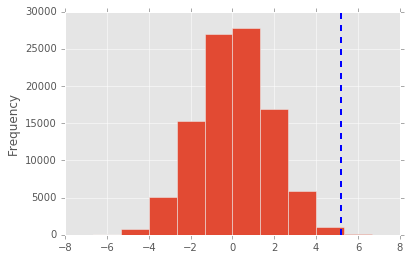

In [23]:
plt.figure()
result_series.plot.hist()
plt.axvline(5.2 , color='b', linestyle='dashed', linewidth=2)

In [24]:
((result_series > 5.2).sum() + 1) /(100000)

0.00083000000000000001

In [130]:
df_verizon_data = pd.read_csv('Data/Verizon.csv')
len(df_verizon_data)

1687

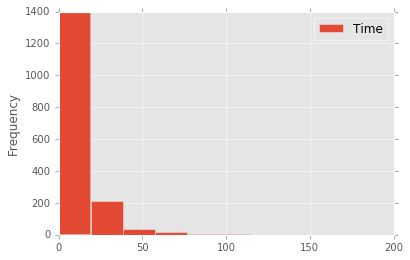

In [10]:
# Histogram for ILEC
df_verizon_data[df_verizon_data['Group'] == 'ILEC'].plot.hist()

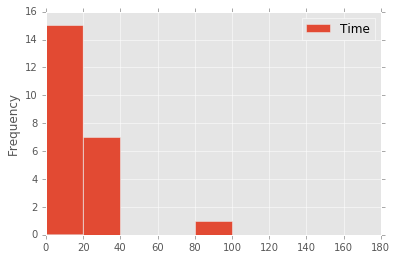

In [23]:
# Histogram for CLEC using bins 
bins = np.arange(0,200,20)
df_verizon_data[df_verizon_data['Group'] == 'CLEC'].plot.hist(bins = bins)

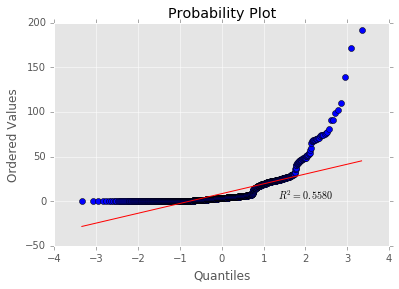

In [25]:
probplot( df_verizon_data[df_verizon_data['Group'] == 'ILEC']['Time'], dist= 'norm', plot=pylab)
pylab.show()

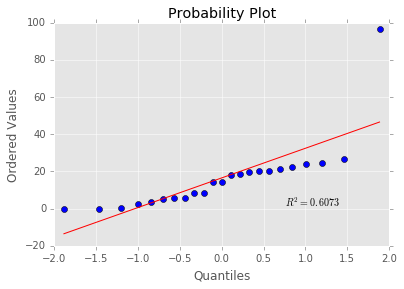

In [27]:
probplot( df_verizon_data[df_verizon_data['Group'] == 'CLEC']['Time'], dist= 'norm', plot=pylab)
pylab.show()

In [31]:
# equivalent of tapply is pivot_table in python
df_verizon_data.pivot_table( columns= 'Group' , values= 'Time', aggfunc= np.mean)

Group
CLEC    16.509130
ILEC     8.411611
Name: Time, dtype: float64

In [167]:
result = pd.Series(np.zeros(10**4 -1))
def permute_verizon(d  = 0):
    index=np.random.choice(np.arange(0,1687,1), size = 1664, replace = False)
    not_index = np.setdiff1d(np.arange(0,1687,1),index , assume_unique = True)
    return df_verizon_data['Time'].iloc[index].mean() - df_verizon_data['Time'].iloc[not_index].mean()
result=result.apply(permute_verizon)

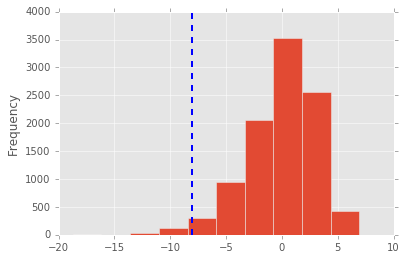

In [168]:
plt.figure()
result.plot.hist()
plt.axvline(-8.0972, color='b', linestyle='dashed', linewidth=2)

In [169]:
# calculating P value
((result <= -8.0972).sum() +1)/(10**4) 

0.018200000000000001

In [189]:
# Calculating median
df_verizon_data.pivot_table( columns= 'Group' , values= 'Time', aggfunc= np.median)

observed1 = df_verizon_data.pivot_table( columns= 'Group' , values= 'Time', aggfunc= np.median)['ILEC'] 
observed2 = df_verizon_data.pivot_table( columns= 'Group' , values= 'Time', aggfunc= np.median)['CLEC'] 
observed = observed1 - observed2
print(observed)

-10.74


In [191]:
result = pd.Series(np.zeros(10**4 -1))
def permute_verizon(d  = 0):
    index=np.random.choice(np.arange(0,1687,1), size = 1664, replace = False)
    not_index = np.setdiff1d(np.arange(0,1687,1),index , assume_unique = True)
    return df_verizon_data['Time'].iloc[index].median() - df_verizon_data['Time'].iloc[not_index].median()
result=result.apply(permute_verizon)

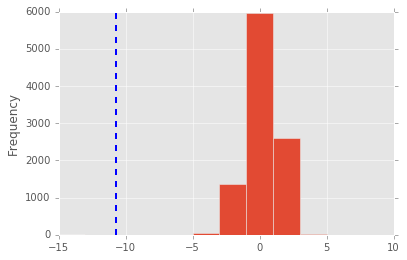

In [193]:
plt.figure()
bins = np.arange(-15,10,2)
result.plot.hist( bins = bins)
plt.axvline(observed, color='b', linestyle='dashed', linewidth=2)

In [196]:
# calculating P value
((result <=observed).sum() +1)/(10**4) 

0.001

In [198]:
# Calculating median
df_verizon_data.pivot_table( columns= 'Group' , values= 'Time', aggfunc= np.median)

observed1 = trim_mean(df_verizon_data[df_verizon_data['Group']=='ILEC']['Time'] , 0.25)
observed2 = trim_mean(df_verizon_data[df_verizon_data['Group']=='CLEC']['Time'] , 0.25)
observed = observed1 - observed2
print(observed)

-10.3359975962


In [201]:
result = pd.Series(np.zeros(10**4 -1))
def permute_verizon(d  = 0):
    index=np.random.choice(np.arange(0,1687,1), size = 1664, replace = False)
    not_index = np.setdiff1d(np.arange(0,1687,1),index , assume_unique = True)
    return trim_mean(df_verizon_data['Time'].iloc[index], 0.25) - trim_mean(df_verizon_data['Time'].iloc[not_index], 0.25)
result=result.apply(permute_verizon)

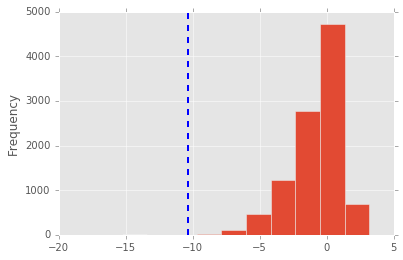

In [202]:
plt.figure()
result.plot.hist()
plt.axvline(observed, color='b', linestyle='dashed', linewidth=2)

In [203]:
# calculating P value
((result <=observed).sum() +1)/(10**4) 

0.00050000000000000001

In [214]:
observed1=(df_verizon_data[df_verizon_data['Group']=='ILEC']['Time'] > 10).mean()
observed2=(df_verizon_data[df_verizon_data['Group']=='CLEC']['Time'] > 10).mean()
observed = observed1 - observed2
print(observed)

-0.336852006689


In [208]:
result = pd.Series(np.zeros(10**4 -1))
def permute_verizon(d  = 0):
    index=np.random.choice(np.arange(0,1687,1), size = 1664, replace = False)
    not_index = np.setdiff1d(np.arange(0,1687,1),index , assume_unique = True)
    return (df_verizon_data['Time'].iloc[index] > 10).mean() - (df_verizon_data['Time'].iloc[not_index] > 10).mean()
result=result.apply(permute_verizon)

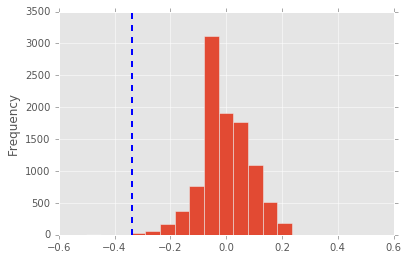

In [216]:
plt.figure()
bins = np.linspace(-0.5,0.5,20)
result.plot.hist(bins = bins)
plt.axvline(observed, color='b', linestyle='dashed', linewidth=2)

In [218]:
observed1= df_verizon_data[df_verizon_data['Group']=='ILEC']['Time'].var()
observed2=df_verizon_data[df_verizon_data['Group']=='CLEC']['Time'].var()
observed = observed1/observed2
print(observed)

0.5673060856142311


In [222]:
result = pd.Series(np.zeros(10**4 -1))
def permute_verizon(d  = 0):
    index=np.random.choice(np.arange(0,1687,1), size = 1664, replace = False)
    not_index = np.setdiff1d(np.arange(0,1687,1),index , assume_unique = True)
    return df_verizon_data['Time'].iloc[index].var()/df_verizon_data['Time'].iloc[not_index].var()
result=result.apply(permute_verizon)

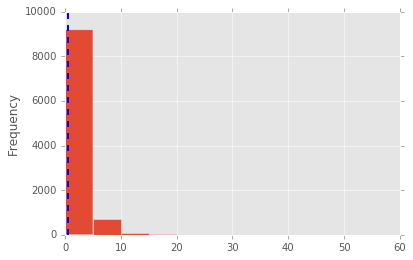

In [224]:
plt.figure()
bins = np.arange(0,60,5)
result.plot.hist(bins = bins)
plt.axvline(observed, color='b', linestyle='dashed', linewidth=2)

In [231]:
# chi square cdf 
# computing the 
print(1 - chi2.cdf(x = 23.45 , df = 4))

0.000102933085359


In [234]:
df_GS2002 = pd.read_csv('Data/GSS2002.csv')
df_GS2002.head()

,ID,Region,Gender,Race,Education,Marital,Religion,Happy,Income,PolParty,Politics,Marijuana,DeathPenalty,OwnGun,GunLaw,SpendMilitary,SpendEduc,SpendEnv,SpendSci,Pres00,Postlife
0,1,South Central,Female,White,HS,Divorced,Inter-nondenominational,Pretty happy,30000-34999,Strong Rep,Conservative,NaN,Favor,No,Favor,Too little,Too little,About right,About right,Bush,Yes
1,2,South Central,Male,White,Bachelors,Married,Protestant,Pretty happy,75000-89999,Not Str Rep,Conservative,Not legal,Favor,Yes,Oppose,About right,Too little,About right,About right,Bush,Yes
2,3,South Central,Female,White,HS,Separated,Protestant,NaN,35000-39999,Strong Rep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bush,NaN
3,4,South Central,Female,White,Left HS,Divorced,Protestant,NaN,50000-59999,"Ind, Near Dem",NaN,NaN,NaN,NaN,NaN,About right,Too little,Too little,Too little,NaN,NaN
4,5,South Central,Male,White,Left HS,Divorced,Protestant,NaN,40000-49999,Ind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
# Doing a chi square test
Education = df_GS2002.Education
DeathPenalty = df_GS2002.DeathPenalty
#cannot do factor variable test thats bad in python

In [255]:
# Example Page 63
obs = np.array([[42, 20, 38], [33, 27, 50]])
X_Squared,p,df, table = chi2_contingency(obs)

print(X_Squared)

3.29018709337
